# Perform basic frequency & ngram analysis of abstracts

In [ ]:
import csv
import ast
import pandas as pd
from transformers import AutoTokenizer, AutoModelForMaskedLM
import spacy
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

In [154]:
#collect basic NER, token and sentence frequencies per abstract
input_csv = open("../data/01_raw/paragraphs.csv")
reader = csv.DictReader(input_csv)

na = 0
no_sentences_per_abstract = []
no_tokens_per_abstract = []
paragraphs_per_abstract = []
entities_per_abstract = []
abstract_sentences_total = []
doc_info_no_na = []
paragraphs_no_na = []
tokens_per_abstract = []
i = 0
for row in tqdm(reader):
    if row['paragraphs'] == "['NA']":
        na += 1
        #print(row)
        #print(f"Non values so far:{na}")
    else: 
        paragraphs_per_abstract.append(len(ast.literal_eval(row["paragraphs"])))
        paragraphs_no_na.append(row['paragraphs'])
        doc_info_no_na.append(row['doc_info'])
        

        #use spacy to split abstracts into sentences
        abstract = "".join(ast.literal_eval(row["paragraphs"]))
        doc = nlp(abstract)
        abstract_sentences = [sent.text for sent in doc.sents]
        no_sentences_per_abstract.append(len(abstract_sentences))
        abstract_sentences_total.append(abstract_sentences)

        #use spacy to obtain tokens
        abstract_tokens = [token.text for token in doc]
        no_tokens_per_abstract.append(len(abstract_tokens))
        tokens_per_abstract.append(abstract_tokens)

 
 

193827it [1:07:18, 47.99it/s] 


In [323]:
input_csv = open("../data/01_raw/paragraphs.csv")
reader = csv.DictReader(input_csv)
# Create an empty list to store the rows
rows = []

# Iterate over each row
for row in tqdm(reader):
    doc_info = row['doc_info']
    year_match = re.search(r'Year:\s(\d{4})', doc_info)
    
    if year_match:
        publication_year = year_match.group(1)
        row['publication_year'] = publication_year
        rows.append(row)

df_year_counts = pd.DataFrame(rows)
df_year_counts.to_csv('df_year_younts.csv', index=False)

193827it [00:02, 70557.67it/s]


In [155]:
data = {'doc_info': doc_info_no_na, 'paragraphs': paragraphs_no_na, 'paragraphs_per_abstract': paragraphs_per_abstract, 'no_sentences_per_abstract': no_sentences_per_abstract, 'no_tokens_per_abstract': no_tokens_per_abstract}
enriched_cleaned_df = pd.DataFrame(data)
enriched_cleaned_df.head()
enriched_cleaned_df.to_csv('enriched_cleaned_para_df.csv', index=False)

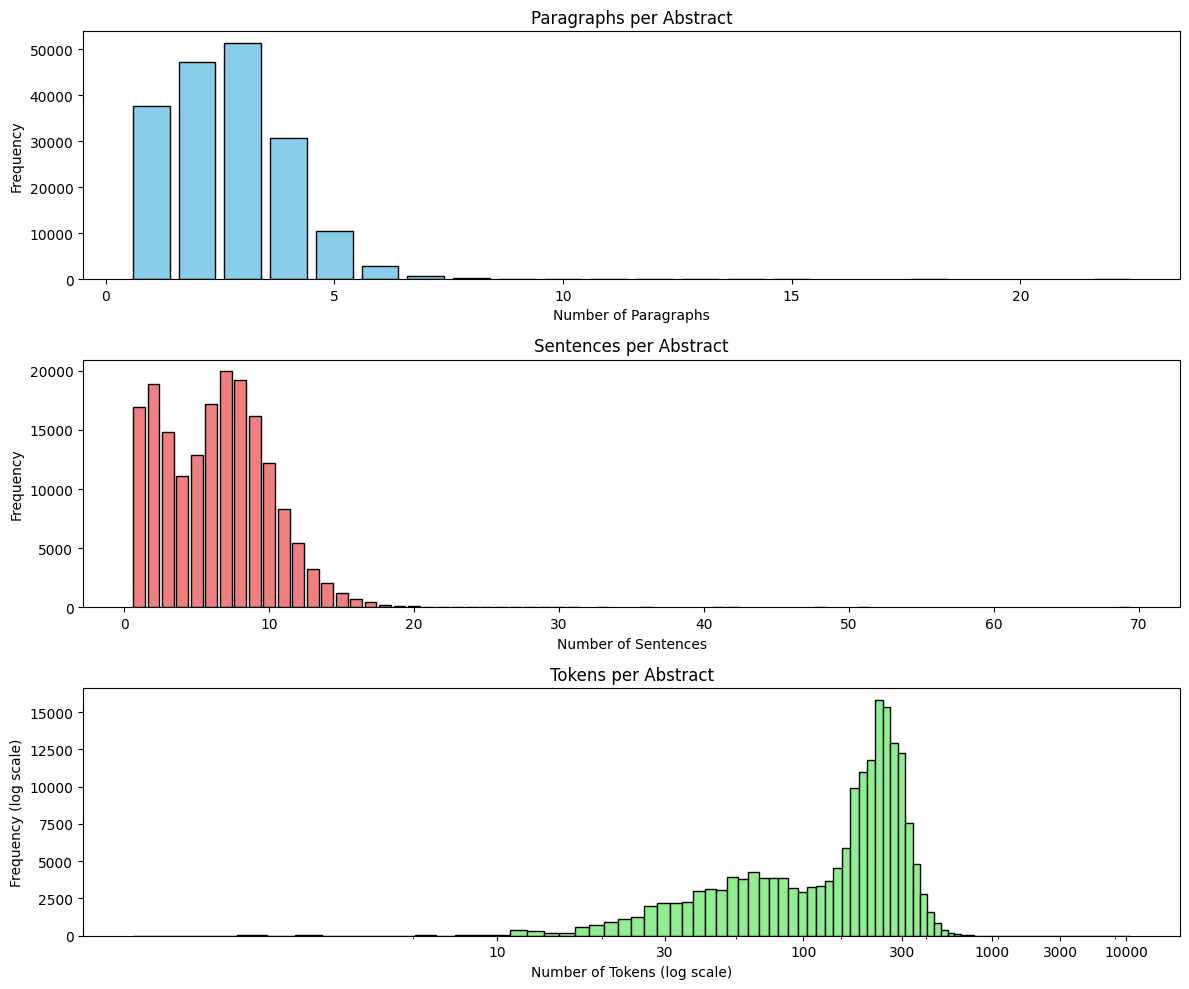

In [415]:
# Create bar plots for each column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

# Bar plot for 'paragraphs_per_abstract'
axes[0].bar(enriched_cleaned_df['paragraphs_per_abstract'].value_counts().index,
            enriched_cleaned_df['paragraphs_per_abstract'].value_counts(), color='skyblue', edgecolor='black')
axes[0].set_title('Paragraphs per Abstract')
axes[0].set_xlabel('Number of Paragraphs')
axes[0].set_ylabel('Frequency')

# Bar plot for 'no_sentences_per_abstract'
axes[1].bar(enriched_cleaned_df['no_sentences_per_abstract'].value_counts().index,
            enriched_cleaned_df['no_sentences_per_abstract'].value_counts(), color='lightcoral', edgecolor='black')
axes[1].set_title('Sentences per Abstract')
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')

# Histogram for 'no_tokens_per_abstract'
axes[2].hist(np.log1p(enriched_cleaned_df['no_tokens_per_abstract']), bins=90, color='lightgreen', edgecolor='black')
axes[2].set_title('Tokens per Abstract')
axes[2].set_xscale('log')
axes[2].set_xlabel('Number of Tokens (log scale)')
axes[2].set_ylabel('Frequency (log scale)')
# Add more x ticks for the log scale
xticks = [10, 30, 100, 300, 1000, 3000, 10000]
axes[2].set_xticks(np.log1p(xticks))
axes[2].set_xticklabels(xticks)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

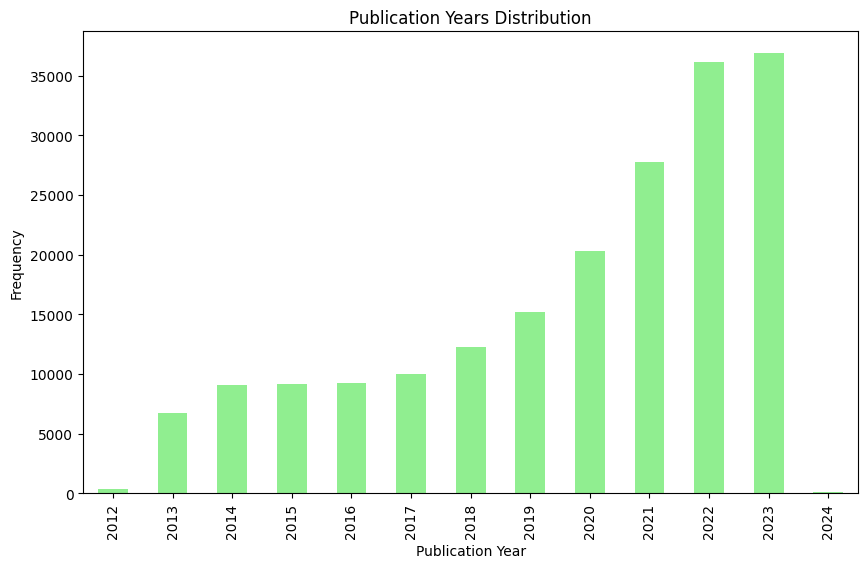

IndexError: index 2 is out of bounds for axis 0 with size 2

In [419]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'publication_year' column
# Replace 'your_file.csv' with the actual file path if you haven't loaded the DataFrame yet

# Create a bar plot of the publication years
plt.figure(figsize=(10, 6))
df_year_counts['publication_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Publication Years Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'no_tokens_per_abstract'
axes[2].hist(np.log1p(enriched_cleaned_df['no_tokens_per_abstract']), bins=90, color='lightgreen', edgecolor='black')
axes[2].set_title('Tokens per Abstract')
axes[2].set_xscale('log')
axes[2].set_xlabel('Number of Tokens (log scale)')
axes[2].set_ylabel('Frequency (log scale)')


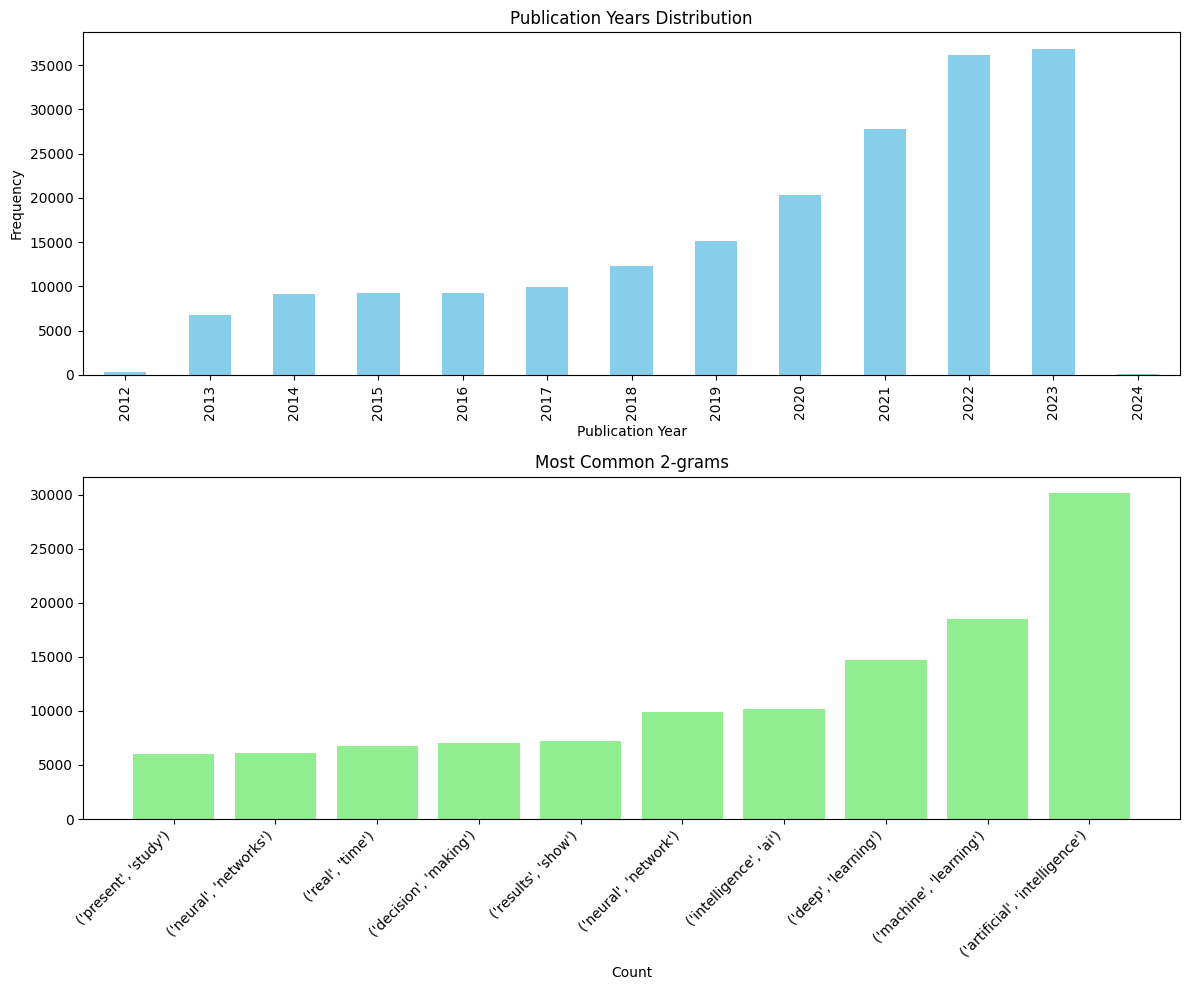

In [423]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_year_counts and enriched_cleaned_df are already defined

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot the bar plot of publication years
df_year_counts['publication_year'].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Publication Years Distribution')
axes[0].set_xlabel('Publication Year')
axes[0].set_ylabel('Frequency')

# Plot the bar plot with reversed order
plt.bar([str(ngram) for ngram in df_top_ngrams['N-gram']][::-1], df_top_ngrams['Count'][::-1], color='lightgreen')
plt.title(f'Most Common {n}-grams')
plt.xlabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


In [176]:
enriched_cleaned_df[['paragraphs_per_abstract', 'no_sentences_per_abstract', 'no_tokens_per_abstract']].describe()

,paragraphs_per_abstract,no_sentences_per_abstract,no_tokens_per_abstract
count,181499.000000,181499.000000,181499.000000
mean,2.682610,6.342994,182.948159
std,1.288619,3.632424,108.499664
min,1.000000,1.000000,2.000000
25%,2.000000,3.000000,82.000000
50%,3.000000,6.000000,190.000000
75%,3.000000,9.000000,256.000000
max,22.000000,69.000000,10880.000000


In [406]:
percentage_above_512 = (enriched_cleaned_df['no_tokens_per_abstract'] > 512).mean() * 100
print(f"Only in {percentage_above_512:.2f}% of the cases the token length increases 512.")

Only in 0.31% of the cases the token length increases 512.


In [175]:
print(f"Retrieved documents without abstract:{na}")
print(f"Number of retrieved abstracts:{len(doc_info_no_na)+na}")
print(f"Percentage of missing abstracts:{100*na/(len(doc_info_no_na)+na)}%")

Retrieved documents without abstract:12328
Number of retrieved abstracts:193827
Percentage of missing abstracts:6.36031099898363%


In [177]:
flattened_token_corpus = [token for token_list in tokens_per_abstract for token in token_list]

In [425]:
## compute ngrams
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in flattened_token_corpus if word.isalpha() and word.lower() not in stop_words]

# Specify the desired n-gram size
n = 2  # Change this to compute different n-grams (e.g., bigrams, trigrams)

# Compute n-grams
n_grams = list(ngrams(filtered_tokens, n))

# Count the occurrences of each n-gram
n_gram_counts = Counter(n_grams)

# Display the most common n-grams
print(f"10 Most common {n}-grams:")
i = 0
for n_gram, count in n_gram_counts.most_common():
    print(f"{n_gram}: {count}")
    i+=1
    if count < 2000:
        break

10 Most common 2-grams:
('artificial', 'intelligence'): 30176
('machine', 'learning'): 18524
('deep', 'learning'): 14759
('intelligence', 'ai'): 10192
('neural', 'network'): 9932
('results', 'show'): 7247
('decision', 'making'): 7019
('real', 'time'): 6766
('neural', 'networks'): 6068
('present', 'study'): 6060
('long', 'term'): 6010
('study', 'aimed'): 5809
('state', 'art'): 5646
('health', 'care'): 5563
('proposed', 'method'): 5483
('experimental', 'results'): 5258
('results', 'showed'): 5064
('physical', 'activity'): 4698
('convolutional', 'neural'): 4623
('mental', 'health'): 4412
('aim', 'study'): 4198
('emotional', 'intelligence'): 4167
('magnetic', 'resonance'): 4083
('recent', 'years'): 3784
('public', 'health'): 3742
('breast', 'cancer'): 3610
('results', 'suggest'): 3534
('real', 'world'): 3523
('large', 'scale'): 3495
('current', 'study'): 3356
('widely', 'used'): 3303
('working', 'memory'): 3183
('resonance', 'imaging'): 3155
('clinical', 'practice'): 3079
('big', 'data'): 

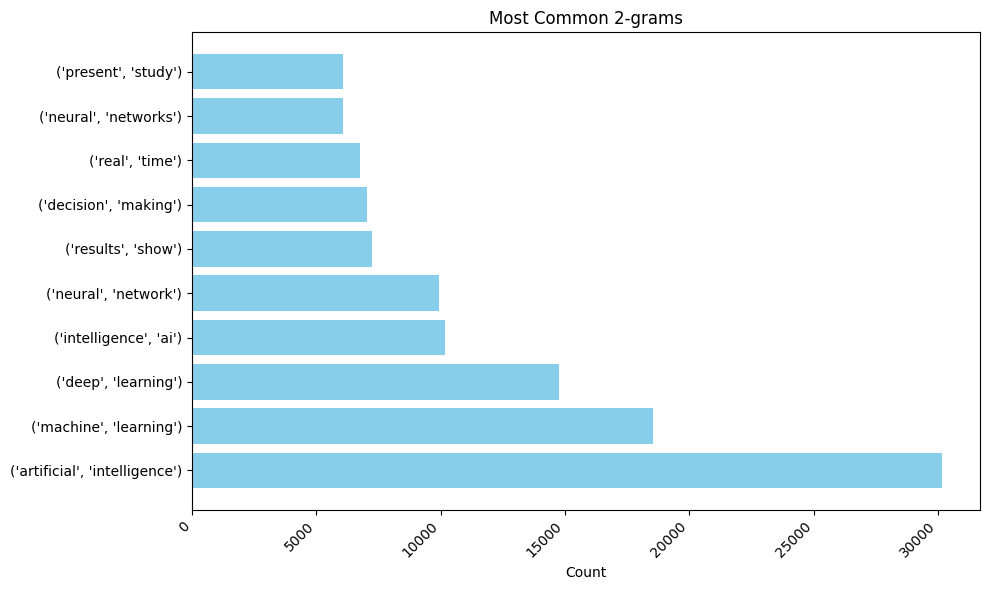

In [181]:
# Create a DataFrame for visualization
top_ngrams = n_gram_counts.most_common(10)
df_top_ngrams = pd.DataFrame(top_ngrams, columns=['N-gram', 'Count'])

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh([str(ngram) for ngram in df_top_ngrams['N-gram']], df_top_ngrams['Count'], color='skyblue')
plt.title(f'Most Common {n}-grams')
plt.xlabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Basic frequency analysis of paragraphs

# Exploratory Kmeans clustering

In [ ]:
paragraph_embeddings = open("../data/01_raw/paragraph_embeddings.csv")
embedding_reader = csv.DictReader(paragraph_embeddings)
combined_dict = defaultdict(list)
embed_dict = defaultdict(list)
from collections import defaultdict
counter = 1

for i, row in tqdm(enumerate(embedding_reader)):
    #extract embeddings
    embed_dict={f'embedding_{i+1}': value for i, value in enumerate(ast.literal_eval(row['embedding']))}
    
    #extract metadata
    pattern = re.compile(r'(\w+)(?:-\d+)?\s*:\s*(.*?)(?=\n|$)', re.DOTALL)
    matches = pattern.findall(row['doc'])
    meta_dict = {key: value.strip() for key, value in matches}
    
    #create joint dict with id
    row_dict = {**meta_dict, **embed_dict}
    row_dict['id'] = i
    
    #append row dict
    for key, value in row_dict.items():
        combined_dict[key].append(value) 

200138it [51:50, 472.66it/s]

In [ ]:
embedding_meta_df = pd.DataFrame(combined_dict)
embedding_meta_df.head()

In [ ]:
embedding_meta_df.to_csv('embedding_meta_df.csv', index=False)

In [ ]:
embedding_meta_df = pd.DataFrame(combined_dict)
embedding_meta_df.head()

In [254]:
import re

# Sample 'combined_doc' string
combined_doc = 'Title: Disorders of communication: dysarthria.\nAuthors: Pam Enderby\nAffiliations: NA\nQualifier: NA\nMajor Qualifier: NA\nDescriptor: Dysarthria, Humans, Speech\nMajor Descriptor: Dysarthria\nAbstract: Dysarthria is a motor speech disorder which can be classified according to the underlying neuropathology and is associated with disturbances of respiration, laryngeal function, airflow direction, and articulation resulting in difficulties of speech quality and intelligibility. There are six major types of dysarthria........ .\nJournal: Handbook of clinical neurology\nLanguage: eng\nYear: 2013\nMonth: NA\n'

# Define a pattern to capture key-value pairs
pattern = re.compile(r'(\w+):\s(.*?)(?=\n|$)', re.DOTALL)
matches = pattern.findall(combined_doc)
doc_dict = {key: value.strip() for key, value in matches}

# Display the resulting dictionary
print(doc_dict)


{'Title': 'Disorders of communication: dysarthria.', 'Authors': 'Pam Enderby', 'Affiliations': 'NA', 'Qualifier': 'NA', 'Descriptor': 'Dysarthria', 'Abstract': 'Dysarthria is a motor speech disorder which can be classified according to the underlying neuropathology and is associated with disturbances of respiration, laryngeal function, airflow direction, and articulation resulting in difficulties of speech quality and intelligibility. There are six major types of dysarthria........ .', 'Journal': 'Handbook of clinical neurology', 'Language': 'eng', 'Year': '2013', 'Month': 'NA'}


In [289]:
import re

# Sample text
text = 'Title: Disorders of communication: dysarthria.\nAuthors: Pam Enderby\nAffiliations: NA\nQualifier: NA\nMajor Qualifier: NA\nDescriptor: Dysarthria, Humans, Speech\nMajor Descriptor: Dysarthria\nJournal: Handbook of clinical neurology\nLanguage: eng\nYear: 2013\nMonth: NA\nParagraph-0: Dysarthria is a motor speech disorder which can be classified according to the underlying neuropathology and is associated with disturbances of respiration, laryngeal function, airflow direction, and articulation resulting in difficulties of speech quality and intelligibility. There are six major types of dysarthria: flaccid dysarthria associated with lower motor neuron impairment, spastic dysarthria associated with damaged upper motor neurons linked to the motor areas of the cerebral cortex, ataxic dysarthria primarily caused by cerebellar dysfunction, and hyperkinetic dysarthria and hypokinetic dysarthria, which are related to a disorder of the extrapyramidal system. The sixth is generally termed a mixed dysarthria and is associated with damage in more than one area, resulting in speech characteristics of at least two groups. The features of the speech disturbance of these six major types of dysarthria are distinctive and can assist with diagnosis. Dysarthria is a frequent symptom of many neurological conditions and is commonly associated with progressive neurological disease.'

pattern = re.compile(r'(\w+)(?:-\d+)?\s*:\s*(.*?)(?=\n|$)', re.DOTALL)
matches = pattern.findall(text)
doc_dict = {key: value.strip() for key, value in matches}

# Display the resulting dictionary
print(doc_dict)


{'Title': 'Disorders of communication: dysarthria.', 'Authors': 'Pam Enderby', 'Affiliations': 'NA', 'Qualifier': 'NA', 'Descriptor': 'Dysarthria', 'Journal': 'Handbook of clinical neurology', 'Language': 'eng', 'Year': '2013', 'Month': 'NA', 'Paragraph': 'Dysarthria is a motor speech disorder which can be classified according to the underlying neuropathology and is associated with disturbances of respiration, laryngeal function, airflow direction, and articulation resulting in difficulties of speech quality and intelligibility. There are six major types of dysarthria: flaccid dysarthria associated with lower motor neuron impairment, spastic dysarthria associated with damaged upper motor neurons linked to the motor areas of the cerebral cortex, ataxic dysarthria primarily caused by cerebellar dysfunction, and hyperkinetic dysarthria and hypokinetic dysarthria, which are related to a disorder of the extrapyramidal system. The sixth is generally termed a mixed dysarthria and is associate

In [282]:
result_dict.keys()

dict_keys(['Title', 'Paragraph-0'])